In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sp = pd.read_csv('Advertising.csv')

In [3]:
sp

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [4]:
sp.shape

(200, 5)

In [5]:
sp.drop(columns=["Unnamed: 0"], inplace=True)
sp.sample(5)

,TV,Radio,Newspaper,Sales
148,38.0,40.3,11.9,10.9
107,90.4,0.3,23.2,8.7
132,8.4,27.2,2.1,5.7
153,171.3,39.7,37.7,19.0
143,104.6,5.7,34.4,10.4


In [6]:
sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
sp.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


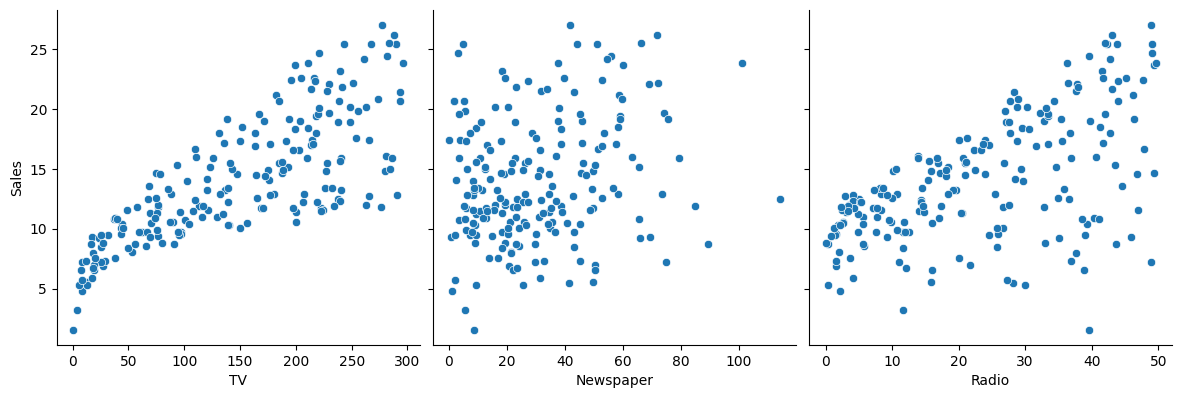

In [8]:
sns.pairplot(sp, x_vars=['TV','Newspaper','Radio'],
            y_vars='Sales', height=4,aspect=1, kind='scatter')
plt.show()

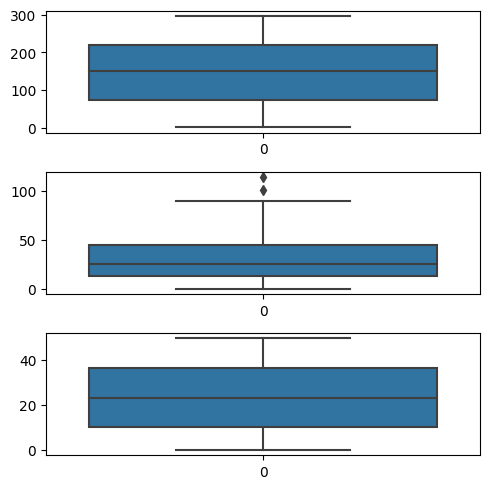

In [9]:
fig,axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(sp['TV'], ax = axs[0])
plt2 = sns.boxplot(sp['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(sp['Radio'], ax = axs[2])
plt.tight_layout()

In [10]:
sp[sp["Newspaper"]>90]

,TV,Radio,Newspaper,Sales
16,67.8,36.6,114.0,12.5
101,296.4,36.3,100.9,23.8


In [11]:

sp = sp[sp["Newspaper"]<=90]


<AxesSubplot: >

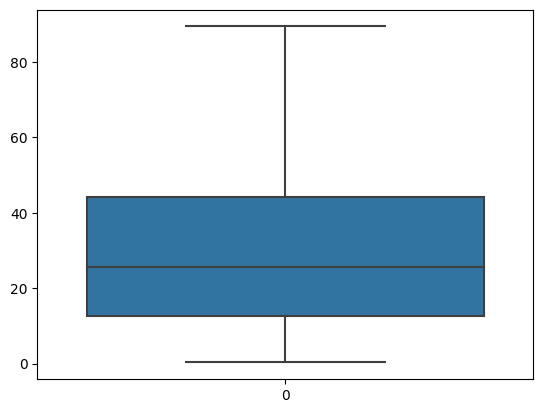

In [12]:
sns.boxplot(sp["Newspaper"])

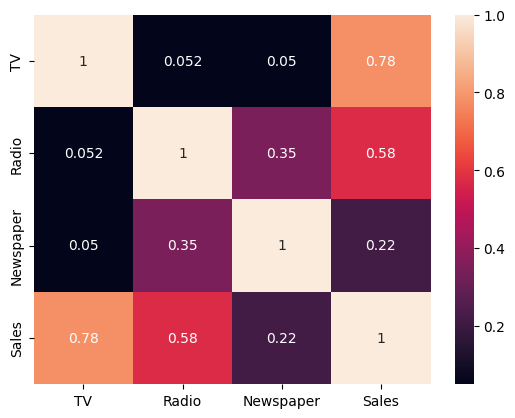

In [13]:
sns.heatmap(sp.corr(), annot=True)
plt.show()

In [26]:
X = sp.drop(columns="Sales")
Y = sp["Sales"]

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [29]:
lr = LinearRegression()

In [33]:
lr.fit(X_train,Y_train)

LinearRegression()

In [34]:
Y_pred=lr.predict(X_test)

In [35]:
r2_score(Y_test,Y_pred)

0.803373470528877

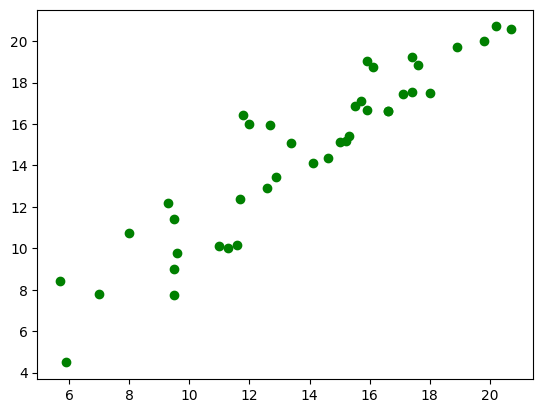

In [36]:
plt.scatter(Y_test,Y_pred,c='g')